<a href="https://colab.research.google.com/github/nagnagg/LinearRegression/blob/main/scikit_learn_%E3%81%A7%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0_(%E5%8D%98%E5%9B%9E%E5%B8%B0%E5%88%86%E6%9E%90%E3%83%BB%E9%87%8D%E5%9B%9E%E5%B8%B0%E5%88%86%E6%9E%90).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[scikit-learn で線形回帰 (単回帰分析・重回帰分析) ](https://pythondatascience.plavox.info/scikit-learn/%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0#google_vignette)

線形回帰モデル (Linear Regression) とは、以下のような回帰式を用いて、説明変数の値から目的変数の値を予測するモデルです。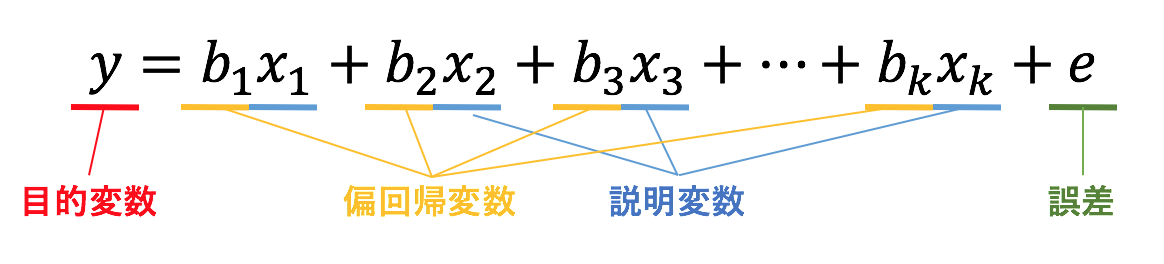

scikit-learn には、線形回帰による予測を行うクラスとして、sklearn.linear_model.LinearRegression が用意されています。

In [2]:
import pandas as pd
import numpy as np

wine = pd.read_csv("http://pythondatascience.plavox.info/wp-content/uploads/2016/07/winequality-red.csv", sep=";")

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# **scikit-learn を用いた線形回帰の実行例: 単回帰分析**

In [4]:
# sklearn.linear_model.LinearRegression クラスを読み込み
from sklearn import linear_model
clf = linear_model.LinearRegression()

In [5]:
# 説明変数に "density (濃度)" を利用
X = wine[['density']].values

In [6]:
# 目的変数に "alcohol (アルコール度数)" を利用
Y = wine['alcohol'].values

In [7]:
# 予測モデルを作成
clf.fit(X, Y)

LinearRegression()

In [8]:
# 回帰係数
print(clf.coef_)

[-280.16382307]


In [9]:
# 切片 (誤差)
print(clf.intercept_)

289.6753433825651


In [10]:
# 決定係数
print(clf.score(X, Y))

0.24619436439710696


In [11]:
#回帰式 [alcohol] = -280.16382307 * [density] + 289.675343383

In [12]:
#matplotlib パッケージ読み込み
import matplotlib.pyplot as plt

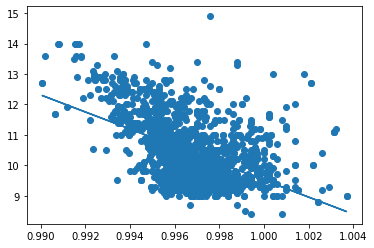

In [13]:
#散布図
plt.scatter(X,Y)

#回帰直線
plt.plot(X, clf.predict(X))

#**scikit-learn を用いた線形回帰の実行例: 重回帰分析`**`

In [14]:
#sklearn.linear_model.linearRegressionクラスを読み込み
from sklearn import linear_model
clf = linear_model.LinearRegression()

In [15]:
#説明変数に"quality(品質スコア)"以外すべてを利用する。
wine_except_quality = wine.drop("quality", axis=1)
X = wine_except_quality.values

In [16]:
#目的変数に"alcohol(アルコール度数)"を利用する。
Y = wine['quality'].values

In [17]:
#予測モデルを作成
clf.fit(X,Y)

#偏回帰係数
print(pd.DataFrame({"Name":wine_except_quality.columns,
                    "Coefficients":clf.coef_}).sort_values(by='Coefficients'))

#切片
print(clf.intercept_)

                    Name  Coefficients
7                density    -17.881164
4              chlorides     -1.874225
1       volatile acidity     -1.083590
8                     pH     -0.413653
2            citric acid     -0.182564
6   total sulfur dioxide     -0.003265
5    free sulfur dioxide      0.004361
3         residual sugar      0.016331
0          fixed acidity      0.024991
10               alcohol      0.276198
9              sulphates      0.916334
21.96520844944842


重回帰式
[quality] = -17.881164 × [density] + -1.874225 × [chlorides] +
            -1.083590 × [volatile acidity] + -0.413653 × [pH] + 
            -0.182564 × [citric acid] + -0.003265 × [total sulfur dioxide] + 
            0.004361 × [free sulfur dioxide] + 0.016331 × [residual sugar] + 
            0.024991 × [fixed acidity] + 0.276198 × [alcohol] + 
            0.916334 × [sulphates] + 21.9652084495

#**各変数を正規化して重回帰分析**

In [18]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

In [19]:
#データフレームの各列を正規化
wine2 = wine.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
wine2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.081384,0.117931,-0.270976,-0.043754,-0.019143,-0.068661,-0.044056,0.077336,0.156604,-0.058772,-0.157382,-0.127205
1,-0.045986,0.241219,-0.270976,0.004191,0.017585,0.128522,0.072552,0.003915,-0.087491,0.013085,-0.095844,-0.127205
2,-0.045986,0.159027,-0.230976,-0.016357,0.007568,-0.012323,0.026616,0.018599,-0.040247,-0.004880,-0.095844,-0.127205
3,0.254899,-0.169740,0.289024,-0.043754,-0.020812,0.015846,0.047817,0.092021,-0.118987,-0.046796,-0.095844,0.072795
4,-0.081384,0.117931,-0.270976,-0.043754,-0.019143,-0.068661,-0.044056,0.077336,0.156604,-0.058772,-0.157382,-0.127205


In [20]:
#説明変数に"quality(品質スコア)"以外すべてを利用する。
wine2_except_quality = wine2.drop("quality", axis=1)
X = wine2_except_quality.values

In [21]:
#説明変数に"quality（品質スコア）"を利用する。
Y = wine2['quality'].values

In [22]:
#予測モデルを作成
clf.fit(X,Y)

LinearRegression()

In [23]:
#偏回帰係数
print(pd.DataFrame({"Name":wine2_except_quality.columns,
                    "Coefficients":np.abs(clf.coef_)}).sort_values(by='Coefficients'))

                    Name  Coefficients
2            citric acid      0.036513
3         residual sugar      0.047687
7                density      0.048708
0          fixed acidity      0.056479
5    free sulfur dioxide      0.061931
8                     pH      0.105068
6   total sulfur dioxide      0.184775
4              chlorides      0.224532
9              sulphates      0.306056
1       volatile acidity      0.316408
10               alcohol      0.359057
